In [4]:
!pip install xgboost

You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
#Cleaning Data
import os
import pandas as pd
import numpy as np
import datetime
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#viz
import matplotlib.pyplot as plt
#modeling tools
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
#modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
#deploying model
from sklearn.externals import joblib

# Import - We

In [6]:
#import data
we_outage = pd.read_csv('We_Cleaned.csv')
we_outage.head()

,Volt_D,Volt_E,Volt_F,Volt_H,Volt_J,Volt_M,Volt_R,Volt_SD,Volt_TV,Volt_US,...,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,outage category,outage subcategory
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Equipment,NaN
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,Equipment,Conductor/Cable
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Vegetation,Out Clearance Zone (ROW)
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Equipment,Conductor/Cable
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,Equipment,NaN


# Train - We

In [17]:
#split features and target
X = we_outage.drop(['outage category', 'outage subcategory', 'Cdur', 'CMI', 'Ckva', 'Calls', 'CI'], axis=1)
Y = pd.factorize(we_outage['outage category'])[0]
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=53)

In [18]:
#set up model and train
model = RandomForestClassifier(n_estimators=100, max_features=None, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Test - We

In [19]:
#find accuracy
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.4900179528366832

In [20]:
#which target is best predicted
confusion_matrix(y_test, y_pred)

array([[13819,  4999,   727,  1180,  1263,  2364,   114,    71],
       [ 4845, 12338,   622,   939,  1127,  1994,   105,    66],
       [  864,   812,   849,   186,   619,   355,    21,    18],
       [ 1675,  1237,   147,  1625,   313,   509,    27,    28],
       [ 1378,  1309,   411,   305,  2465,   560,    38,    38],
       [ 2320,  2168,   316,   471,   530,  4844,    68,    15],
       [  192,   115,    13,    34,    46,    79,   146,     2],
       [   50,    45,    12,    12,    20,     6,     1,   216]])

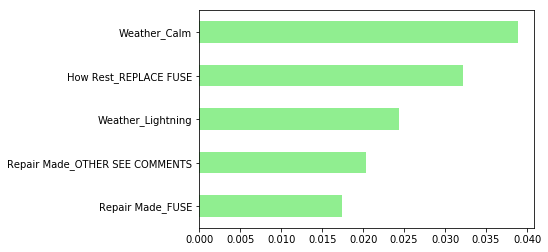

In [21]:
# Create a pd.Series of features importances
importances_rf = pd.Series(model.feature_importances_, index = X.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()[-5:]
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen')
plt.show()

In [22]:
#look at all features
importances_rf.sort_values()

Volt_D                                0.000000e+00
SS Location_GREDE                     0.000000e+00
Sys_D                                 0.000000e+00
SS Location_WALKER                    0.000000e+00
SS Location_CARROLLVILLE              2.553652e-07
SS Location_RANDOM LAKE               9.712903e-07
SS Location_LYNDON                    1.487672e-06
SS Location_LA BELLE                  1.732364e-06
SS Location_GRAFTON                   1.773085e-06
SS Location_PLAINS                    1.775241e-06
Volt_ZX                               2.182589e-06
SS Location_GREVES                    2.389307e-06
SS Location_MARSHFIELD                2.959669e-06
SS Location_AIR LIQUIDE               2.976042e-06
Sys_ZX                                3.247038e-06
Cls_X                                 4.733825e-06
SS Location_DOUSMAN                   4.968116e-06
SS Location_PARKLAND                  5.346991e-06
SS Location_PLEASANT VALLEY           6.334780e-06
SS Location_OOSTBERG           

# Deploy - We

In [ ]:
# Save the model as a pickle in a file 
#joblib.dump(model, 'Non-Text_RF.pkl')

# Import - WPS

In [23]:
#import data
wps_outage = pd.read_csv('WPS_Cleaned.csv')
wps_outage.head()

,State_MI,State_WI,Agency_ANT,Agency_CHI,Agency_ER,Agency_GB,Agency_KEW,Agency_MER,Agency_MIN,Agency_MM,...,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,outage category,outage subcategory
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Public,Foreign Object
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Planned,New Construction
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Public,Fire/Police
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Unknown,NaN
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Vegetation,Other


# Train - WPS

In [29]:
#split features and target
X = wps_outage.drop(['outage category', 'outage subcategory', 'outage_duration', 'CustomerMinutes', 'num_cust'], axis=1)
Y = pd.factorize(wps_outage['outage category'])[0]
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=53)

In [30]:
#set up models
rf = RandomForestClassifier(n_estimators=100, max_features=None, n_jobs=-1)
rf = rf.fit(X_train, y_train)

# Test - WPS

In [31]:
#model performance
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.535445842234354

In [32]:
#which target is best predicted
confusion_matrix(y_test, y_pred)

array([[ 121,  124,   44,  316,  319,   36,   35,    2,    1,    0],
       [  40, 3090,   45,  340,  213,   65,   40,    1,    0,    0],
       [  21,  131,  312,  816,  621,  213,  154,    3,    2,    0],
       [  77,  311,  347, 5835,  948,  176,  621,   21,    2,    0],
       [  75,  315,  265, 1017, 2562,  365,  290,   21,    5,    0],
       [  13,  143,  151,  158,  613,  489,   87,    2,    2,    0],
       [  18,   76,  127, 1104,  449,  115, 1062,    9,    1,    0],
       [   5,   11,    8,   73,   74,   13,   17,   40,    0,    0],
       [   0,    6,    0,    9,    4,    0,    2,    0,   21,    0],
       [   1,    6,    0,    5,    2,    0,    1,    0,    0,    3]])

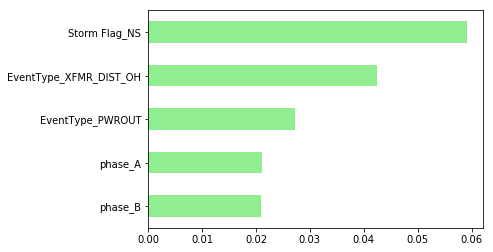

In [33]:
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()[-5:]
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen')
plt.show()

In [34]:
#look at all features
importances_rf.sort_values()

EventType_XFMR_STPDWN_OH     0.000000
EventType_SUB_LOCKOUT        0.000000
EventType_PARTPWR_A          0.000000
EventType_UNMAPPED_SWITCH    0.000002
EventType_XFMR_STPDWN_UG     0.000004
EventType_VOLT_REG           0.000023
EventType_SECTIONALIZER      0.000040
EventType_PRIMOPEN           0.000044
EventType_TMP_FUSE           0.000061
EventType_PARTPWR_U          0.000107
EventType_TMP_SWITCH         0.000121
phase_NA                     0.000133
EventType_PWROUT_A           0.000191
EventType_UNMAPPED_FUSE      0.000281
EventType_TRANS_LOCKOUT      0.000285
week_53                      0.000667
EventType_PRIMARY_OH         0.000668
Storm Flag_MN                0.000688
EventType_PRIMARY_UG         0.000727
EventType_FDR_LOCKOUT        0.001234
Storm Flag_EE                0.001310
Storm Flag_MJ                0.001415
EventType_DISCONNECT         0.001612
week_6                       0.002356
week_5                       0.002461
phase_BC                     0.002533
week_4      

# Deploy - WPS

In [ ]:
# Save the model as a pickle in a file 
#joblib.dump(best_model, 'WPS_Non_Text_RF.pkl')